In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from collections import Counter

# Load The Marvel Universe Social Network datasets
I decided to select this [dataset](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) to perform the data analysis and data visualizations of this course.

In [2]:
edges_df = pd.read_csv('../the-marvel-universe-social-network/edges.csv')
hero_network_df = pd.read_csv('../the-marvel-universe-social-network/hero-network.csv')
nodes_df = pd.read_csv('../the-marvel-universe-social-network/nodes.csv')

# Exploring the datasets

## `edges.csv` dataset
The `edges.csv` dataset simply indicates in which comics the heroes appear.

In [3]:
# Basic description of the dataset
edges_df.describe()

,hero,comic
count,96104,96104
unique,6439,12651
top,SPIDER-MAN/PETER PARKER,COC 1
freq,1577,111


From here it is clear that various heros and comics appear more than once, and thus it is sensible to perform some kind of frequency analysis.

Furthermore, there are 96104 entries in this dataset.

In [4]:
# Basic information of the dataset
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96104 entries, 0 to 96103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero    96104 non-null  object
 1   comic   96104 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


Fortunately this dataset does not contain any `NaN` values, however it handles values that are not numeric (strings):

In [5]:
# First ten values
edges_df.head(10)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
5,3-D MAN/CHARLES CHAN,H2 252
6,3-D MAN/CHARLES CHAN,M/PRM 35
7,3-D MAN/CHARLES CHAN,M/PRM 36
8,3-D MAN/CHARLES CHAN,M/PRM 37
9,3-D MAN/CHARLES CHAN,WI? 9


## `hero-network.csv` dataset
The `hero-network.csv` dataset simply contains the network of heroes which appear together in the comics.

In [6]:
# Basic description of the dataset
hero_network_df.describe()

,hero1,hero2
count,574467,574467
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8149,8350


From this description it is difficult to get some insights about the data. However, this dataset is meant to represent the edges of the social network in the marvel universe, so it would be useful to obtain mesaures such as the centrality of the network to exploit this dataset.

In [7]:
hero_network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


This dataset also faces the same issue as the previous one: it does not contain any numeric value.

In [8]:
hero_network_df.head(10)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
5,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
6,"STEELE, SIMON/WOLFGA","FORTUNE, DOMINIC"
7,"STEELE, SIMON/WOLFGA","ERWIN, CLYTEMNESTRA"
8,"STEELE, SIMON/WOLFGA",IRON MAN/TONY STARK
9,"STEELE, SIMON/WOLFGA",IRON MAN IV/JAMES R.


## `nodes.csv` dataset
This dataset simply specifies whether a node in the hero-comic network is a hero or a comic.

In [9]:
nodes_df.describe()

,node,type
count,19090,19090
unique,19090,2
top,2001 10,comic
freq,1,12651


In [10]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB


As well as the previous datasets, it does not contain any numeric values.

In [11]:
nodes_df.head(10)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
5,4-D MAN/MERCURIO,hero
6,8-BALL/,hero
7,A '00,comic
8,A '01,comic
9,A 100,comic


# Preparing the data
Since all the values in the datasets are strings, then it is necessary to map those strings to a numeric key so that the data analysis and data visualization are easier to handle.

## `edges.csv` dataset
First assign numeric keys to the string values of the `hero` column.

In [12]:
# Get numeric keys for the 'hero' column
edges_heroes = edges_df['hero']
# Filter duplicate heroes
edges_heroes_unique = edges_heroes.unique()
# Get numeric values for the string values in the dataset
heroes_from_name = {edges_heroes_unique[i]: i for i in range(len(edges_heroes_unique))}
heroes_from_id = {i: edges_heroes_unique[i] for i in range(len(edges_heroes_unique))}
# Get how often a hero appears in the dataset
hero_frequency = Counter(edges_heroes)

Then assign numeric keys to the string values of the `comic` column.

In [13]:
# Get numeric keys for the 'comic' column
edges_comics = edges_df['comic']
# Filter duplicate comics
edges_comics_unique = edges_comics.unique()
# Get numeric values for the string values in the dataset
comics_from_name = {edges_comics_unique[i]: i for i in range(len(edges_comics_unique))}
comics_from_id = {i: edges_comics_unique[i] for i in range(len(edges_comics_unique))}
# Get how often a comic appears in the dataset
comic_frequency = Counter(edges_comics)

Finally, it is useful to compute two dictionaries so that it is easier to keep track in which comic a hero appears or if a comic contains a hero.

In [14]:
hero_in_comics = defaultdict(list)
comic_contains_heroes = defaultdict(list)
for hero, comic in zip(edges_df['hero'], edges_df['comic']):
    hero_in_comics[hero].append(comic)
    comic_contains_heroes[comic].append(hero)

## `hero-network.csv` dataset
From this dataset, the most relevant computation is creating a dictionary to represent the network.

In [15]:
hero_network = defaultdict(list)
for h1, h2 in zip(hero_network_df['hero1'], hero_network_df['hero2']):
    if not h2 in hero_network[h1]:
        hero_network[h1].append(h2)
    if not h1 in hero_network[h2]:
        hero_network[h2].append(h1)

## `nodes.csv` dataset
From this dataset, it is useful to compute a dictionary to map an item to either a hero or comic.

In [16]:
node_type = {node: type_ for node, type_ in zip(nodes_df['node'], nodes_df['type'])}

# Data analysis
Since the whole dataset contains value that are not numeric, meausres such as the *mean* or *standard deviation* cannot offer much insight. However, measures such as the *mode* or the *degree centrality* of the network provides much better insight.

## Mode
In this case, the *mode* indicates the most common values of the dataset

In [17]:
# Most common hero
most_common_hero = hero_frequency.most_common(1)
print(most_common_hero)

[('SPIDER-MAN/PETER PARKER', 1577)]


In [18]:
# Most common comic
most_common_comic = comic_frequency.most_common(1)
print(most_common_comic)

[('COC 1', 111)]


## Degree centrality
This dataset includes a network, so it is natural to determine the most centric nodes.

In [19]:
hero_network_centrality = [(hero, len(relations)) for hero, relations in hero_network.items()]
# Sort from largest to smallest
hero_network_centrality.sort(key=lambda hero_and_centrality: hero_and_centrality[1],
                             reverse=True)
hero_network_centrality

[('CAPTAIN AMERICA', 1907),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267),
 ('VISION ', 1241),
 ('INVISIBLE WOMAN/SUE ', 1236),
 ('HAWK', 1175),
 ('WASP/JANET VAN DYNE ', 1091),
 ('ANT-MAN/DR. HENRY J.', 1082),
 ('CYCLOPS/SCOTT SUMMER', 1081),
 ('ANGEL/WARREN KENNETH', 1073),
 ('STORM/ORORO MUNROE S', 1072),
 ('SHE-HULK/JENNIFER WA', 1071),
 ('DR. STRANGE/STEPHEN ', 1067),
 ('HULK/DR. ROBERT BRUC', 1055),
 ('WONDER MAN/SIMON WIL', 1033),
 ('PROFESSOR X/CHARLES ', 1032),
 ('COLOSSUS II/PETER RA', 1025),
 ('MARVEL GIRL/JEAN GRE', 1005),
 ('HERCULES [GREEK GOD]', 991),
 ('JARVIS, EDWIN ', 986),
 ('SUB-MARINER/NAMOR MA', 978),
 ('DAREDEVIL/MATT MURDO', 967),
 ('ICEMAN/ROBERT BOBBY ', 945),
 ('BLACK WIDOW/NATASHA ', 922),
 ('FURY, COL. NICHOLAS ', 9

# Data visualization
## Box plot
From the hero network centrality value that were previously calculated, it is possible to inspect for some outliers.

First, the previous array is converted into a `pandas` data frame.

In [20]:
hero_network_centrality_df = defaultdict(list)
for hero, centrality in hero_network_centrality:
    hero_network_centrality_df['hero'].append(hero)
    hero_network_centrality_df['centrality'].append(centrality)
hero_network_centrality_df = pd.DataFrame(hero_network_centrality_df)
hero_network_centrality_df

,hero,centrality
0,CAPTAIN AMERICA,1907
1,SPIDER-MAN/PETER PAR,1737
2,IRON MAN/TONY STARK,1522
3,THING/BENJAMIN J. GR,1416
4,MR. FANTASTIC/REED R,1379
...,...,...
6421,STEEL SPIDER/OLLIE O,1
6422,MASTER OF VENGEANCE,1
6423,SCOPE,1
6424,QUASAR,1


Then to look for outliers in a visual way, a box plot is computed.

<AxesSubplot:ylabel='centrality'>

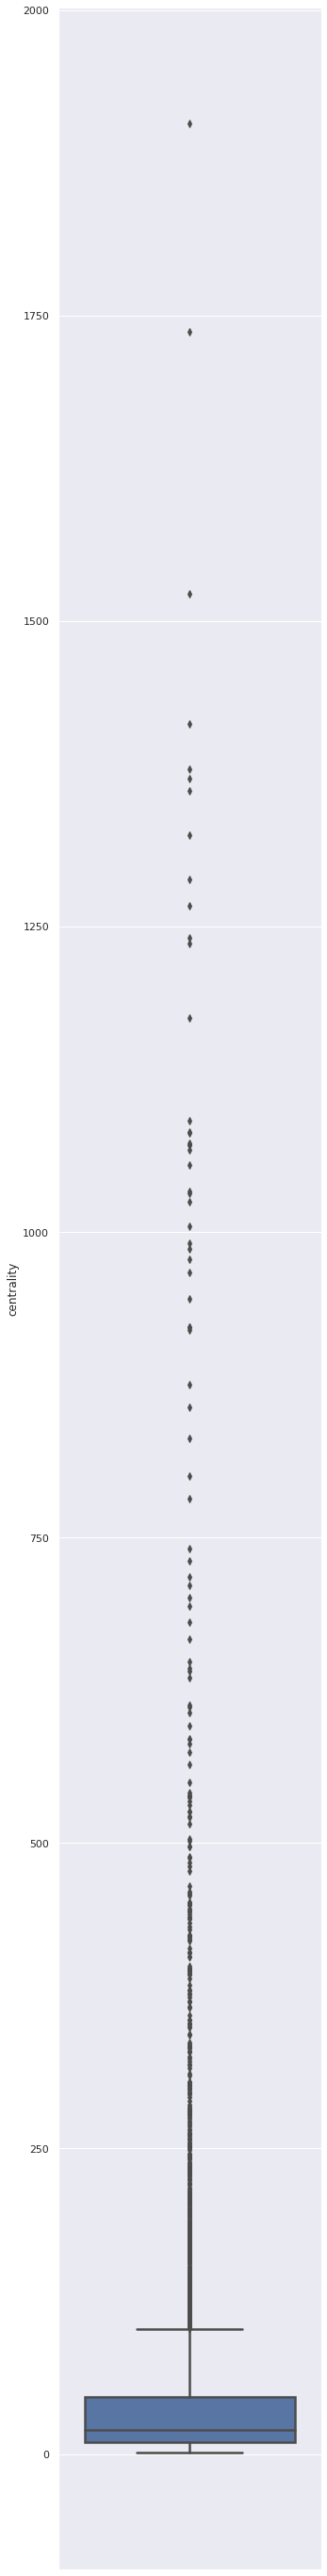

In [21]:
sns.set(rc={"figure.figsize":(5, 50)})
sns.boxplot(y=hero_network_centrality_df['centrality'],
            linewidth=2.5)

From here it is clear that there are a lot of popular marvel comic characters that are in fact outliers in the marvel universe itself! They are outliers in the sense that not many marvel characters appear together with so many other characters in the same comic.

In [22]:
hero_network_centrality_df.head(25)

,hero,centrality
0,CAPTAIN AMERICA,1907
1,SPIDER-MAN/PETER PAR,1737
2,IRON MAN/TONY STARK,1522
3,THING/BENJAMIN J. GR,1416
4,MR. FANTASTIC/REED R,1379
5,WOLVERINE/LOGAN,1371
6,HUMAN TORCH/JOHNNY S,1361
7,SCARLET WITCH/WANDA,1325
8,THOR/DR. DONALD BLAK,1289
9,BEAST/HENRY &HANK& P,1267


Now, some percentiles are shown

In [23]:
hero_network_centrality_df.quantile(0.25)

centrality    10.0
Name: 0.25, dtype: float64

In [24]:
hero_network_centrality_df.quantile(0.5)

centrality    20.0
Name: 0.5, dtype: float64

In [25]:
hero_network_centrality_df.quantile(0.75)

centrality    47.0
Name: 0.75, dtype: float64

In [26]:
hero_network_centrality_df.quantile(0.90)

centrality    110.0
Name: 0.9, dtype: float64

Most characters seem to have less than a 110 appearances on the comics.

## Heatmap

In [61]:
top_50_heroes = list(hero_network_centrality_df.head(50)['hero'])
first_50_comics = list(comics_from_name.keys())[:50]

In [62]:
heatmap_df = defaultdict(list)
# Let's just cry when we are not dealing with small numbers
for hero in top_50_heroes:
    top_hero_relations = set(hero_network[hero])
    for comic in first_50_comics:
        heroes_in_comic = set(comic_contains_heroes[comic])
        related_to_top_hero = len(top_hero_relations & heroes_in_comic)
        heatmap_df[hero].append(related_to_top_hero)
heatmap_df = pd.DataFrame(heatmap_df)

In [63]:
heatmap_df

,CAPTAIN AMERICA,SPIDER-MAN/PETER PAR,IRON MAN/TONY STARK,THING/BENJAMIN J. GR,MR. FANTASTIC/REED R,WOLVERINE/LOGAN,HUMAN TORCH/JOHNNY S,SCARLET WITCH/WANDA,THOR/DR. DONALD BLAK,BEAST/HENRY &HANK& P,...,SHADOWCAT/KATHERINE,BLACK PANTHER/T'CHAL,CRYSTAL [INHUMAN],PSYLOCKE/ELISABETH B,NOVA/RICHARD RIDER,SILVER SURFER/NORRIN,DR. DOOM/VICTOR VON,"ROBERTSON, JOE",CANNONBALL II/SAM GU,"RICHARDS, FRANKLIN B"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,5,6,6,6,5,6,6,6,6,...,5,6,5,4,4,5,4,3,4,5
2,10,6,6,7,7,6,7,6,6,6,...,5,6,6,5,4,5,5,3,4,6
3,92,92,92,91,91,92,91,92,91,91,...,92,91,91,46,51,70,57,45,34,62
4,6,6,5,6,6,7,6,5,6,5,...,5,5,5,3,1,4,4,2,3,4
5,6,6,5,6,6,7,6,5,6,5,...,5,5,5,3,1,4,4,2,3,4
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
9,5,1,1,2,2,1,2,1,1,1,...,1,1,1,0,0,0,0,0,0,1


<AxesSubplot:>

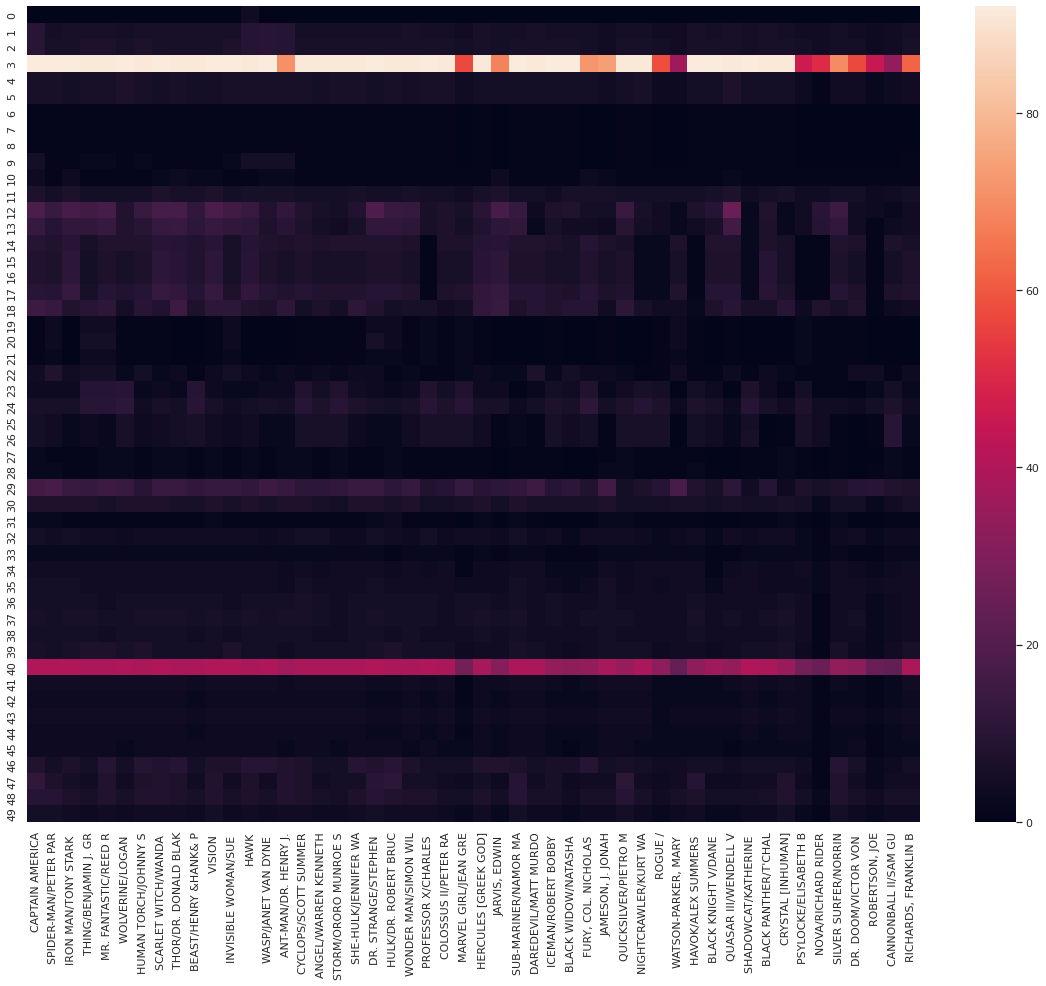

In [64]:
plt.subplots(figsize=(20,15))
sns.heatmap(heatmap_df)

In [65]:
len(comics_from_id)

12651